In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import os
from dgp import DgpProportion, ExperimentImpact

from multiprocessing import Pool
from simulate import run_simulation, simulate, run_simulation_ind, run_simulation_ind_informative, run_simulation_informative

In [3]:
experiment_types = {
    'uninformative_independent': run_simulation_ind,
    'informative_independent': run_simulation_ind_informative,
    'uninformative_correlated': run_simulation,
    'informative_correlated': run_simulation_informative,
}

### Simulate A/A tests

In [4]:
for i, (exp_name, exp_func) in enumerate(experiment_types.items()):
    print(f'{i}: {exp_name}')
    # make directory for the experiment
    try:
        os.makedirs(f'data/{exp_name}')
    except FileExistsError:
        pass
    # Multiprocessing to simulate in parallel
    if __name__ == '__main__':
        with Pool(4) as pool:
            list_sim = pool.map(exp_func, range(100)) #run_simulation
    for c,i in enumerate(list_sim):
        i.to_parquet(f'data/{exp_name}/sim_{c}.parquet')
    del list_sim # to free up memory


0: uninformative_independent
1: informative_independent
2: uninformative_correlated
3: informative_correlated


#### Test plots

In [ ]:
# # Multiprocessing to simulate in parallel
# if __name__ == '__main__':
#     with Pool(4) as pool:
#         list_sim = pool.map(run_simulation_informative, range(100)) #run_simulation
# for c,i in enumerate(list_sim):
#     i.to_parquet(f'data/corr_inf/sim_beta_{c}.parquet')

# Import a list of simulated experiment results
list_sim = [pd.read_parquet(f'data/corr_inf/sim_beta_{i}.parquet') for i in range(100)]

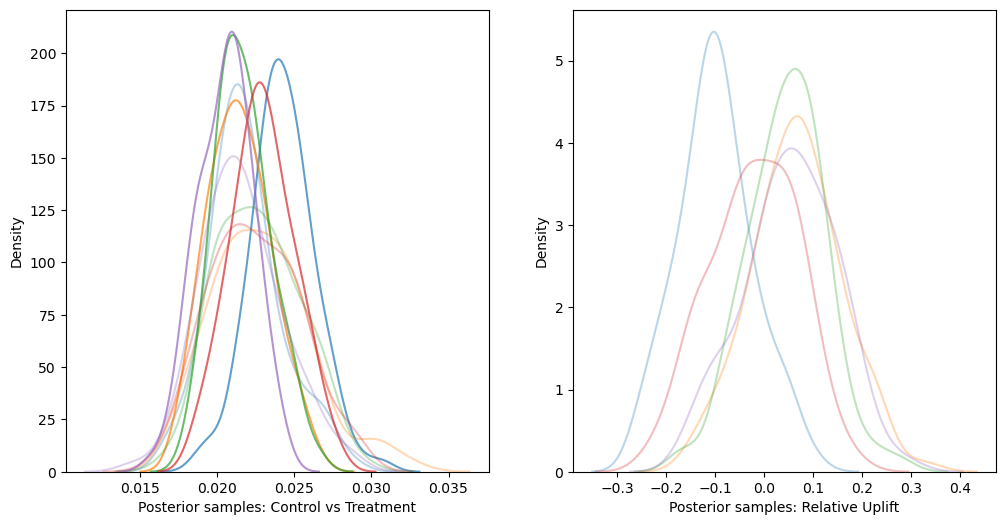

In [6]:
# Example of simulation
# plt.hist(list_sim[1]['control_posterior_samples'].iloc[-1], alpha=0.5)
# plt.hist(list_sim[1]['treatment_posterior_samples'].iloc[-1], alpha=0.5)
# sns.kdeplot(list_sim[10]['control_posterior_samples'].iloc[10], color='blue')
# sns.kdeplot(list_sim[10]['treatment_posterior_samples'].iloc[10], color='orange')
# for i in range(1000,20000,1000):
#     sns.kdeplot(list_sim[10]['control_posterior_samples'].iloc[i], color='blue', alpha=i/20000)
#     sns.kdeplot(list_sim[10]['treatment_posterior_samples'].iloc[i], color='orange', alpha=i/20000)

# Generate two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_xlabel('Posterior samples: Control vs Treatment')
axes[1].set_xlabel('Posterior samples: Relative Uplift')

for c,i in enumerate(range(0,100,20)):
    step = 10000
    sns.kdeplot(list_sim[i]['control_posterior_samples'].iloc[step], color=sns.color_palette("tab10", n_colors=10)[c], alpha=0.7, ax=axes[0])
    sns.kdeplot(list_sim[i]['treatment_posterior_samples'].iloc[step], color=sns.color_palette("tab10", n_colors=10)[c], alpha=0.3, ax=axes[0])
    sns.kdeplot(list_sim[i]['rel_uplift_posterior_samples'].iloc[step], color=sns.color_palette("tab10", n_colors=10)[c], alpha=0.3, ax=axes[1])

In [7]:
# Example of simulation
list_sim[1]

,unit_id,cluster_id,success_prob,outcome,treatment,control,control_successes_cum,control_cum,control_rate,treatment_successes_cum,...,control_alpha_posterior,control_beta_posterior,control_posterior_samples,rel_lift_posterior_var,rel_lift_posterior_mean,rel_uplift_posterior_samples,treatment_posterior_samples,ptb,exp_loss,pvalue
0,0,0,0.020,0,0,True,0,1,0.250000,0,...,30,971,"[0.024438290272323696, 0.0320828698258205, 0.0...",0.010000,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.00,NaN,NaN
1,1,0,0.020,0,0,True,0,2,0.166667,0,...,30,972,"[0.026427007430280442, 0.021181821921136493, 0...",0.010000,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.00,NaN,NaN
2,2,0,0.020,0,0,True,0,3,0.125000,0,...,30,973,"[0.034393166109602, 0.03282240100576752, 0.033...",0.010000,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.00,NaN,NaN
3,3,0,0.021,0,1,False,0,3,0.125000,0,...,30,973,"[0.028101244674656117, 0.03726616341771457, 0....",0.009995,0.000469,"[-0.029199781411997375, 0.06787662193252919, 0...","[0.0272806944727511, 0.039795664702894626, 0.0...",0.63,-0.003004,NaN
4,4,0,0.020,0,0,True,0,4,0.100000,0,...,30,974,"[0.03313813257801506, 0.022579843865933837, 0....",0.009997,0.000457,"[0.08387297129491329, -0.20376075205700256, 0....","[0.03591752622049795, 0.01797895789848146, 0.0...",0.46,-0.002277,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0,0.020,0,0,True,212,10066,0.021109,219,...,242,10824,"[0.02243723222650187, 0.022364716504005525, 0....",0.004984,0.023619,"[-0.053513959747088405, 0.03948011483086318, 0...","[0.021236527084296776, 0.023247678079743365, 0...",0.56,-0.000813,0.628649
19996,19996,0,0.021,0,1,False,212,10066,0.021109,219,...,242,10824,"[0.02361316905371014, 0.022652254263631297, 0....",0.004983,0.023568,"[0.10424644984937276, 0.015630409291760766, -0...","[0.026074758097252494, 0.023006318269152885, 0...",0.64,-0.001132,0.629399
19997,19997,0,0.021,0,1,False,212,10066,0.021109,219,...,242,10824,"[0.020466223748355387, 0.022776749742922556, 0...",0.004983,0.023518,"[-0.05290868772687994, -0.03303743322958838, -...","[0.0193833827071052, 0.022024264394103706, 0.0...",0.64,-0.001186,0.630150
19998,19998,0,0.021,0,1,False,212,10066,0.021109,219,...,242,10824,"[0.023092989400838204, 0.021331492684064535, 0...",0.004982,0.023467,"[0.022373724067339038, -0.10096290216877822, -...","[0.02360966557358254, 0.01917780327508932, 0.0...",0.66,-0.000905,0.630901


### Sample checkpoints

In [8]:
# Import a list of simulated experiment results
list_sim = [pd.read_parquet(f'data/uninformative_independent/sim_{i}.parquet') for i in range(100)]

In [18]:
minimum_waiting_period = 1000
num_impressions_before_check = 10 # Represents frequency of checking
list_check = [sim.iloc[minimum_waiting_period::num_impressions_before_check] for sim in list_sim] 
list_check[2]
del list_sim

### Analysis

In [10]:
PVAL_THRESHOLD = 0.05
PTB_THRESHOLD = 0.95 # TODO: Make this a two-sided test or make the other one, one-sided.
LOSS_THRESHOLD = -1e-4

In [11]:
pval_df = pd.concat([i['pvalue'] for i in list_check], axis=1).T
pval_df.index = [f'pvalue_{i}' for i in range(len(pval_df))]

ptb_df = pd.concat([i['ptb'] for i in list_check], axis=1).T
ptb_df.index = [f'ptb_{i}' for i in range(len(ptb_df))]

loss_df = pd.concat([i['exp_loss'] for i in list_check], axis=1).T
loss_df.index = [f'loss_{i}' for i in range(len(ptb_df))]

In [12]:
print(
    'Proportion of significant (by p-value) experiments (without peeking):', 
    (pval_df.iloc[:,-1]<PVAL_THRESHOLD).mean()
)
print(
    'Proportion of "significant" (by PTB) experiments (without peeking):', 
    (ptb_df.iloc[:,-1]>PTB_THRESHOLD).mean()
)
print(
    'Proportion of "significant" (by loss) experiments (without peeking):', 
    (loss_df.iloc[:,-1]>LOSS_THRESHOLD).mean()
)

Proportion of significant (by p-value) experiments (without peeking): 0.0
Proportion of "significant" (by PTB) experiments (without peeking): 0.06
Proportion of "significant" (by loss) experiments (without peeking): 0.0


In [13]:
print(
    'Proportion of significant (by p-value) experiments (with peeking):', 
    ((pval_df<PVAL_THRESHOLD).any(axis=1)).mean()
)
print(
    'Proportion of "significant" (by PTB) experiments (with peeking):', 
    ((ptb_df>PTB_THRESHOLD).any(axis=1)).mean()
)
print(
    'Proportion of "significant" (by loss) experiments (with peeking):', 
    ((loss_df>LOSS_THRESHOLD).any(axis=1)).mean()
)

Proportion of significant (by p-value) experiments (with peeking): 0.35
Proportion of "significant" (by PTB) experiments (with peeking): 0.45
Proportion of "significant" (by loss) experiments (with peeking): 0.24


### Plots

#### p-values

In [14]:
pval_sample_for_plot = pval_df.sample(n=100, axis='rows', random_state=1)

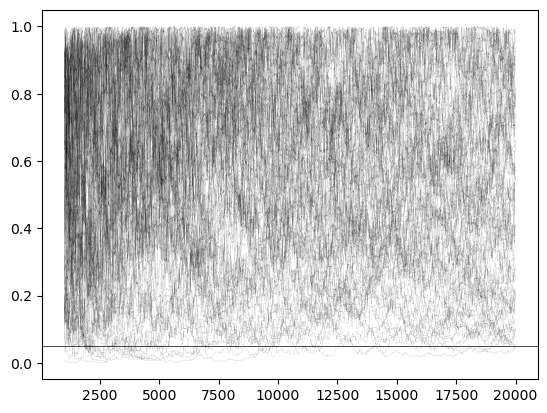

In [15]:
plt.plot(pval_sample_for_plot.T, alpha=0.5, linewidth=0.1, color='black')

pval_sample_reaching_threshold = pval_sample_for_plot[pval_sample_for_plot.iloc[:,-1] < PVAL_THRESHOLD]
plt.plot(pval_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(PVAL_THRESHOLD, linewidth=0.5, color='black')
plt.show()

In [16]:
pvalue_stops = np.argmax(pval_sample_for_plot.values < PVAL_THRESHOLD, axis=1)
pvalue_stops[pvalue_stops==0]=-2 # because later we add by 1 to make remaining columns nan

pval_sample_cutoff_plot = pval_sample_for_plot.copy()
for c,i in enumerate(pvalue_stops):
    pval_sample_cutoff_plot.iloc[c,i+1:] = np.nan
    
# pval_sample_cutoff_plot

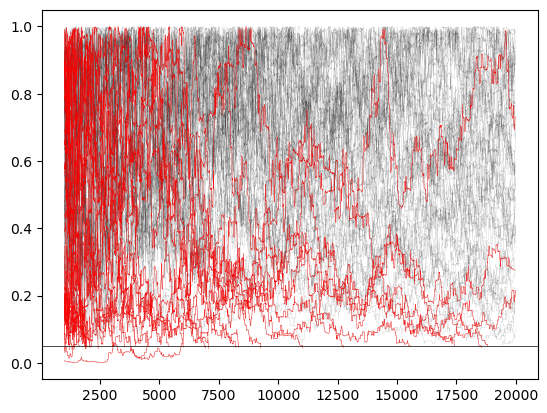

In [17]:
plt.plot(pval_sample_cutoff_plot.T, alpha=0.5, linewidth=0.1, color='black')

pval_sample_reaching_threshold = pval_sample_cutoff_plot[(pval_sample_for_plot < PVAL_THRESHOLD).any(axis=1)]
plt.plot(pval_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(PVAL_THRESHOLD, linewidth=0.5, color='black')
plt.show()

#### PTB

In [ ]:
ptb_sample_for_plot = ptb_df.sample(n=100, axis='rows', random_state=1)
# ptb_sample_for_plot

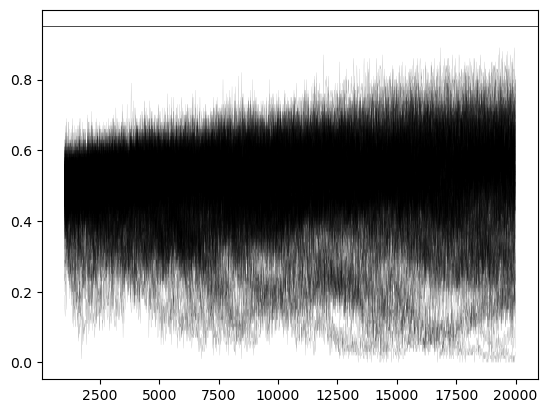

In [ ]:
# TODO: Make this a two-sided test or make the other one, one-sided.
plt.plot(ptb_sample_for_plot.T, alpha=0.5, linewidth=0.1, color='black')

ptb_sample_reaching_threshold = ptb_sample_for_plot[ptb_sample_for_plot.iloc[:,-1] > PTB_THRESHOLD]
plt.plot(ptb_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(PTB_THRESHOLD, linewidth=0.5, color='black')
plt.show()

In [ ]:
ptb_stops = np.argmax(ptb_sample_for_plot.values > PTB_THRESHOLD, axis=1)
ptb_stops[ptb_stops==0]=-2 # because later we add by 1 to make remaining columns nan

ptb_sample_cutoff_plot = ptb_sample_for_plot.copy()
for c,i in enumerate(ptb_stops):
    ptb_sample_cutoff_plot.iloc[c,i+1:] = np.nan
    
# pval_sample_cutoff_plot

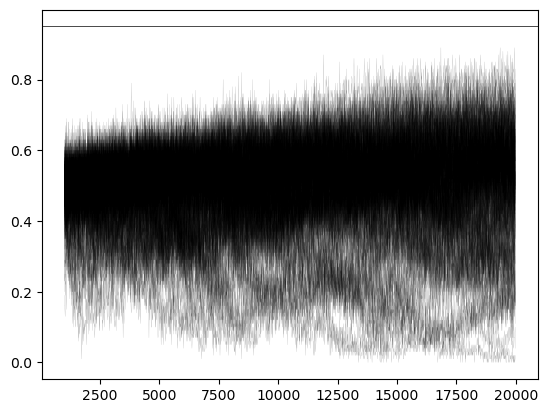

In [ ]:
plt.plot(ptb_sample_cutoff_plot.T, alpha=0.5, linewidth=0.1, color='black')

ptb_sample_reaching_threshold = ptb_sample_cutoff_plot[(ptb_sample_for_plot > PTB_THRESHOLD).any(axis=1)]
plt.plot(ptb_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(PTB_THRESHOLD, linewidth=0.5, color='black')
plt.show()

#### Loss

In [ ]:
loss_sample_for_plot = loss_df.sample(n=100, axis='rows', random_state=1).iloc[:,1:]

In [ ]:
loss_sample_for_plot

,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000
loss_80,-0.005324,-0.004290,-0.003099,-0.002637,-0.002092,-0.002253,-0.002698,-0.002803,-0.002127,-0.001664,-0.001734,-0.002350,-0.001471,-0.001070,-0.001059,-0.001445,-0.001328,-0.001236,-0.000981
loss_84,-0.005864,-0.003939,-0.003395,-0.002588,-0.003289,-0.003762,-0.002353,-0.001504,-0.001407,-0.001418,-0.001105,-0.001435,-0.000928,-0.001574,-0.001181,-0.001080,-0.001696,-0.001089,-0.000916
loss_33,-0.004104,-0.002959,-0.002338,-0.003341,-0.002965,-0.002134,-0.001770,-0.001868,-0.002379,-0.002361,-0.001674,-0.001939,-0.001535,-0.001783,-0.001999,-0.001740,-0.001978,-0.002005,-0.001488
loss_81,-0.005897,-0.004312,-0.003183,-0.003493,-0.002704,-0.002220,-0.002282,-0.002151,-0.002967,-0.002632,-0.003169,-0.002536,-0.002614,-0.001956,-0.002264,-0.002522,-0.002814,-0.002367,-0.002304
loss_93,-0.004345,-0.002800,-0.003599,-0.003196,-0.002896,-0.002896,-0.003476,-0.003772,-0.002399,-0.002241,-0.002314,-0.002655,-0.002264,-0.002180,-0.001503,-0.001493,-0.000912,-0.001102,-0.000718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loss_75,-0.003461,-0.002963,-0.004535,-0.002864,-0.003723,-0.003509,-0.003335,-0.003630,-0.003377,-0.003385,-0.003948,-0.003174,-0.003313,-0.003188,-0.002833,-0.002626,-0.002422,-0.002068,-0.001441
loss_9,-0.004330,-0.003191,-0.001813,-0.002885,-0.002216,-0.001684,-0.001119,-0.001769,-0.001640,-0.001693,-0.001174,-0.001102,-0.000399,-0.001603,-0.000412,-0.000829,-0.000850,-0.001397,-0.000788
loss_72,-0.004869,-0.004006,-0.003105,-0.002362,-0.001703,-0.001759,-0.001861,-0.001774,-0.001994,-0.001970,-0.001799,-0.001982,-0.001417,-0.001589,-0.002180,-0.001949,-0.001983,-0.001726,-0.002108
loss_12,-0.004950,-0.004619,-0.003182,-0.003558,-0.002634,-0.003219,-0.002824,-0.002125,-0.001716,-0.001050,-0.001602,-0.001903,-0.001630,-0.001620,-0.001983,-0.002183,-0.002567,-0.002373,-0.002315


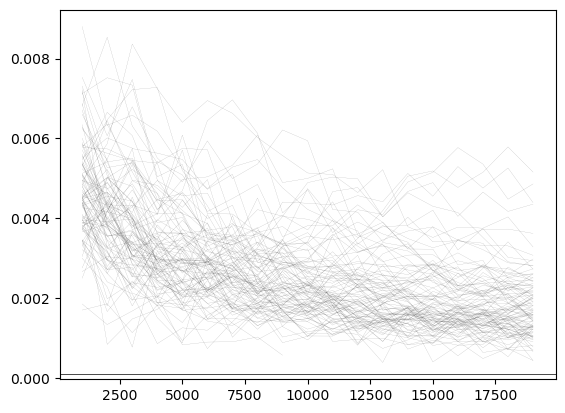

In [ ]:
plt.plot(0-loss_sample_for_plot.T, alpha=0.5, linewidth=0.1, color='black')

loss_sample_reaching_threshold = loss_sample_for_plot[loss_sample_for_plot.iloc[:,-1] > LOSS_THRESHOLD]
plt.plot(0-loss_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(0-LOSS_THRESHOLD, linewidth=0.5, color='black')
# plt.
plt.show()

In [ ]:
loss_stops = np.argmax(loss_sample_for_plot.values > LOSS_THRESHOLD, axis=1)
loss_stops[loss_stops==0]=-2 # because later we add by 1 to make remaining columns nan

loss_sample_cutoff_plot = loss_sample_for_plot.copy()
for c,i in enumerate(loss_stops):
    loss_sample_cutoff_plot.iloc[c,i+1:] = np.nan
    
# pval_sample_cutoff_plot

In [ ]:
loss_sample_reaching_threshold

,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000


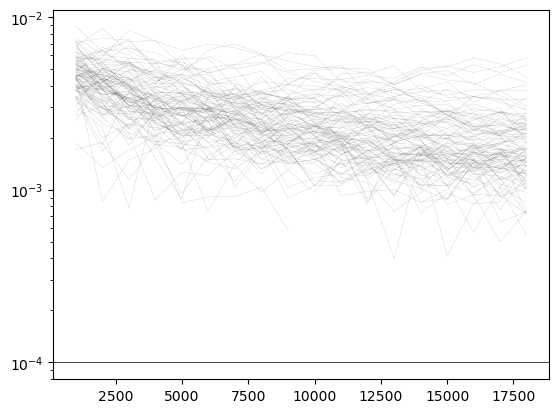

In [ ]:
plt.plot(0-loss_sample_cutoff_plot.T, alpha=0.5, linewidth=0.1, color='black')

loss_sample_reaching_threshold = loss_sample_cutoff_plot[(loss_sample_for_plot > LOSS_THRESHOLD).any(axis=1)]
plt.plot(0-loss_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(0-LOSS_THRESHOLD, linewidth=0.5, color='black')
plt.yscale('log')
plt.show()

### Simulate all scenarios and gather results

In [19]:
PVAL_THRESHOLD = 0.05
PTB_THRESHOLD = 0.95 # TODO: Make this a two-sided test or make the other one, one-sided.
LOSS_THRESHOLD = -1e-4

In [20]:
list_min_samples_before_check = [1, 10, 100, 1000, 10000]
list_check_frequency = [1, 10, 100, 1000, 10000]
exp_names = experiment_types.keys()
simulation_scenario_df = pd.DataFrame(
    product(exp_names, list_min_samples_before_check, list_check_frequency),
    columns=['exp_name', 'min_samples_before_check', 'check_frequency'] 
)
simulation_scenario_df

# Calculate metrics for each simulation scenario and add to the dataframe
pval_no_peeking = []
ptb_no_peeking = []
loss_no_peeking = []
pval_peeking = []
ptb_peeking = []
loss_peeking = []
for row in simulation_scenario_df.iterrows():
    exp_name = row[1]['exp_name']
    min_samples_before_check = row[1]['min_samples_before_check']
    check_frequency = row[1]['check_frequency']

    print(f'Running {exp_name} with min_samples_before_check={min_samples_before_check} and check_frequency={check_frequency}')

    list_sim = [pd.read_parquet(f'data/{exp_name}/sim_{i}.parquet') for i in range(100)]
    samples = [sim.iloc[min_samples_before_check::check_frequency] for sim in list_sim]

    pval_df = pd.concat([i['pvalue'] for i in samples], axis=1).T
    pval_df.index = [f'pvalue_{i}' for i in range(len(pval_df))]

    ptb_df = pd.concat([i['ptb'] for i in samples], axis=1).T
    ptb_df.index = [f'ptb_{i}' for i in range(len(ptb_df))]

    loss_df = pd.concat([i['exp_loss'] for i in samples], axis=1).T
    loss_df.index = [f'loss_{i}' for i in range(len(ptb_df))]

    pval_no_peeking.append((pval_df.iloc[:,-1]<PVAL_THRESHOLD).mean())
    ptb_no_peeking.append((ptb_df.iloc[:,-1]>PTB_THRESHOLD).mean())
    loss_no_peeking.append((loss_df.iloc[:,-1]>LOSS_THRESHOLD).mean())

    pval_peeking.append(((pval_df<PVAL_THRESHOLD).any(axis=1)).mean())
    ptb_peeking.append(((ptb_df>PTB_THRESHOLD).any(axis=1)).mean())
    loss_peeking.append(((loss_df>LOSS_THRESHOLD).any(axis=1)).mean())
    
    del list_sim

simulation_scenario_df['prop_sig_by_pval_no_peeking'] = pval_no_peeking
simulation_scenario_df['prop_sig_by_ptb_no_peeking'] = ptb_no_peeking
simulation_scenario_df['prop_sig_by_loss_no_peeking'] = loss_no_peeking
simulation_scenario_df['prop_sig_by_pval_peeking'] = pval_peeking
simulation_scenario_df['prop_sig_by_ptb_peeking'] = ptb_peeking
simulation_scenario_df['prop_sig_by_loss_peeking'] = loss_peeking

Running uninformative_independent with min_samples_before_check=1 and check_frequency=1
Running uninformative_independent with min_samples_before_check=1 and check_frequency=10
Running uninformative_independent with min_samples_before_check=1 and check_frequency=100
Running uninformative_independent with min_samples_before_check=1 and check_frequency=1000
Running uninformative_independent with min_samples_before_check=1 and check_frequency=10000
Running uninformative_independent with min_samples_before_check=10 and check_frequency=1
Running uninformative_independent with min_samples_before_check=10 and check_frequency=10
Running uninformative_independent with min_samples_before_check=10 and check_frequency=100
Running uninformative_independent with min_samples_before_check=10 and check_frequency=1000
Running uninformative_independent with min_samples_before_check=10 and check_frequency=10000
Running uninformative_independent with min_samples_before_check=100 and check_frequency=1
Runni

In [21]:
simulation_scenario_df

,exp_name,min_samples_before_check,check_frequency,prop_sig_by_pval_no_peeking,prop_sig_by_ptb_no_peeking,prop_sig_by_loss_no_peeking,prop_sig_by_pval_peeking,prop_sig_by_ptb_peeking,prop_sig_by_loss_peeking
0,uninformative_independent,1,1,0.00,0.05,0.00,0.45,0.58,0.39
1,uninformative_independent,1,10,0.00,0.02,0.00,0.43,0.52,0.20
2,uninformative_independent,1,100,0.02,0.07,0.00,0.33,0.45,0.11
3,uninformative_independent,1,1000,0.01,0.05,0.01,0.19,0.26,0.05
4,uninformative_independent,1,10000,0.01,0.03,0.00,0.01,0.03,0.00
...,...,...,...,...,...,...,...,...,...
95,informative_correlated,10000,1,0.02,0.00,0.00,0.12,0.05,0.01
96,informative_correlated,10000,10,0.02,0.00,0.00,0.12,0.01,0.00
97,informative_correlated,10000,100,0.02,0.00,0.00,0.12,0.01,0.00
98,informative_correlated,10000,1000,0.02,0.00,0.00,0.07,0.00,0.00


In [ ]:
simulation_scenario_df.to_clipboard(index=False)
# to paste to excel and check different combinations

In [23]:
simulation_scenario_df.to_csv('data/results/simulation_scenario_df.csv', index=False)

### Recycle bin

In [ ]:
control_rng.beta(a=sdf.control_alpha_posterior.iloc[-1], b=sdf.control_beta_posterior.iloc[-1], size=samples)

array([0.01974007, 0.01826797, 0.01928245, ..., 0.01899221, 0.0182525 ,
       0.02020736])

<Axes: ylabel='Density'>

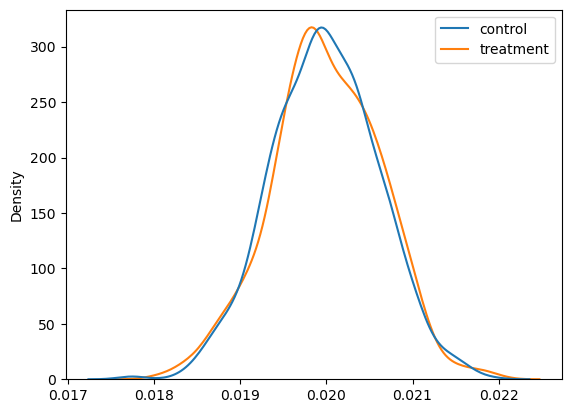

In [ ]:
df_ptb = pd.DataFrame(
    data= [
        [(i['control_successes_cum']/i['control_cum']).iloc[-1] for i in list_ptb],
        [(i['treatment_successes_cum']/i['treatment_cum']).iloc[-1] for i in list_ptb],
    ], index=['control', 'treatment']
).T

sns.kdeplot(df_ptb)

In [ ]:
(df_ptb.control < df_ptb.treatment).mean()

0.518

<Axes: ylabel='Density'>

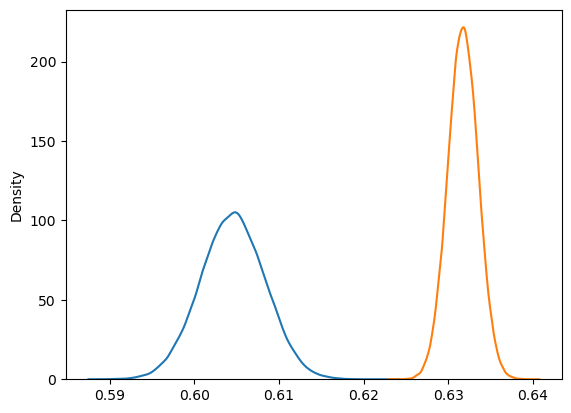

In [ ]:
ca, cb, ta, tb = 10000, 6541, 45465, 26504
sns.kdeplot(np.random.beta(a=ca, b=cb, size=100000))  
sns.kdeplot(np.random.beta(a=ta, b=tb, size=100000))

In [ ]:
control_rng.beta(a=[ca,ta], b=[cb,tb], size=(100_000,2)).mean(axis=0)

array([0.60455223, 0.63172637])

In [ ]:
df = pd.concat([i['ptb'] for i in list_ptb], axis=1)
df.columns = range(1000)


In [ ]:
(df>0.9999999).any().sum()

88

In [ ]:
sdf = list_ptb[880].iloc[:4000]

from scipy.stats import ttest_ind
ttest_ind(sdf[sdf.control==True].outcome, sdf[sdf.control==False].outcome)

TtestResult(statistic=-2.688816518358321, pvalue=0.0072003307203986665, df=3998.0)

In [ ]:
sdf = list_ptb[880].iloc[-1]
print(sdf['control_successes_cum']/sdf['control_cum'], sdf['treatment_successes_cum']/sdf['treatment_cum'])

0.019876050462303698 0.020841227737779463


In [ ]:
list_ptb[880].iloc[0::1000]

,unit_id,cluster_id,success_prob,outcome,treatment,control,control_successes_cum,treatment_successes_cum,control_cum,treatment_cum,control_alpha_posterior,control_beta_posterior,treatment_alpha_posterior,treatment_beta_posterior,ptb
0,0,0,0.02,0,1,False,0,0,0,1,1,1,1,2,0.327
1000,1000,0,0.02,0,1,False,6,11,485,516,7,480,12,506,0.855
2000,2000,0,0.02,0,0,True,12,27,1001,1000,13,990,28,974,0.989
3000,3000,0,0.02,0,1,False,26,42,1508,1493,27,1483,43,1452,0.973
4000,4000,0,0.02,0,0,True,34,58,2033,1968,35,2000,59,1911,0.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95000,95000,0,0.02,0,0,True,947,995,47335,47666,948,46389,996,46672,0.830
96000,96000,0,0.02,0,0,True,961,1005,47842,48159,962,46882,1006,47155,0.826
97000,97000,0,0.02,0,0,True,970,1013,48349,48652,971,47380,1014,47640,0.802
98000,98000,0,0.02,0,1,False,975,1025,48861,49140,976,47887,1026,48116,0.864


In [ ]:
import plotly.express as px
px.line(df.iloc[np.arange(0,20_000,1000), :1000:10])

<Axes: >

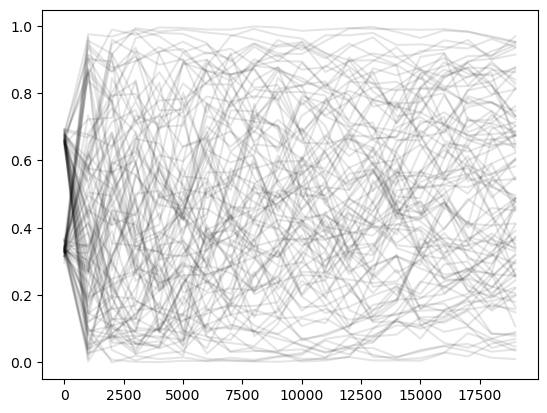

In [ ]:
df.iloc[np.arange(0,20_000,1000), :1000:10].plot(legend=False, color='black', alpha=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
for i in list_ptb:
    data = i[:20_000:100]
    if (data>0.9).any():
        color='red'
        alpha=1
    else:
        color='black'
        alpha=0.1
    ax.plot(data, alpha=alpha, linewidth=0.2, color=color)